# 7. Compare Spending: Promo-Heavy vs. Promo-Light

**Critical Question:** Do promotion-heavy households spend MORE or LESS than promotion-light households?

- If MORE → They're "smart shoppers" worth retaining
- If LESS → They might be "margin killers"

We'll compare:
- Total annual spending
- Average basket value
- Average price per unit (if available)


In [21]:

promo_summary = (
    households
    .groupby('promo_segment')
    .agg(
        num_households=('household_id', 'nunique'),
        mean_total_sales=('total_sales', 'mean'),
        median_total_sales=('total_sales', 'median'),
        mean_num_trips=('num_trips', 'mean'),
        mean_avg_basket=('avg_basket_value', 'mean'),
        median_avg_basket=('avg_basket_value', 'median'),
    )
)

if 'avg_price_per_unit' in households.columns:
    promo_summary['mean_avg_price_unit'] = (
        households.groupby('promo_segment')['avg_price_per_unit'].mean()
    )
    promo_summary['median_avg_price_unit'] = (
        households.groupby('promo_segment')['avg_price_per_unit'].median()
    )

promo_summary = promo_summary.round(2)

print("\n" + "=" * 80)
print("SPENDING COMPARISON: Promo-Heavy vs. Promo-Light")
display(promo_summary)




SPENDING COMPARISON: Promo-Heavy vs. Promo-Light


,num_households,mean_total_sales,median_total_sales,mean_num_trips,mean_avg_basket,median_avg_basket,mean_avg_price_unit,median_avg_price_unit
promo_segment,,,,,,,,
promo_heavy,767,2092.36,1475.98,70.71,32.75,28.40,0.92,0.13
promo_light,1702,1757.46,1126.78,59.70,31.45,26.72,1.37,1.65


In [22]:

print("\n" + "=" * 80)
print("STATISTICAL SIGNIFICANCE TESTS")

heavy_baskets = households[households['promo_segment'] == 'promo_heavy']['avg_basket_value'].dropna()
light_baskets = households[households['promo_segment'] == 'promo_light']['avg_basket_value'].dropna()

t_stat_basket, p_value_basket = stats.ttest_ind(heavy_baskets, light_baskets)

print("\n1. Average Basket Value:")
ttest_df = pd.DataFrame({
    'Metric': [
        'Promo-Heavy Mean',
        'Promo-Light Mean',
        'Difference',
        'T-Statistic',
        'P-Value'
    ],
    'Value': [
        f'${heavy_baskets.mean():.2f}',
        f'${light_baskets.mean():.2f}',
        f'${heavy_baskets.mean() - light_baskets.mean():.2f}',
        f'{t_stat_basket:.4f}',
        f'{p_value_basket:.6f}'
    ]
})
display(ttest_df.set_index('Metric'))

if p_value_basket < 0.05:
    direction = "higher" if heavy_baskets.mean() > light_baskets.mean() else "lower"
    print(f"   ✓ Promo-heavy households have statistically significantly {direction} basket values (p < 0.05)")
else:
    print("   ✗ No statistically significant difference (p >= 0.05)")

heavy_spending = households[households['promo_segment'] == 'promo_heavy']['total_sales'].dropna()
light_spending = households[households['promo_segment'] == 'promo_light']['total_sales'].dropna()

t_stat_sales, p_value_sales = stats.ttest_ind(heavy_spending, light_spending)

print("\n2. Total Annual Spending:")
print(f"   Promo-heavy mean: ${heavy_spending.mean():.2f}")
print(f"   Promo-light mean: ${light_spending.mean():.2f}")
print(f"   Difference: ${heavy_spending.mean() - light_spending.mean():.2f}")
print(f"   T-statistic: {t_stat_sales:.4f}")
print(f"   P-value: {p_value_sales:.6f}")

if p_value_sales < 0.05:
    direction = "higher" if heavy_spending.mean() > light_spending.mean() else "lower"
    print(f"   ✓ Promo-heavy households have statistically significantly {direction} total spending (p < 0.05)")
else:
    print("   ✗ No statistically significant difference (p >= 0.05)")

if 'avg_price_per_unit' in households.columns:
    heavy_prices = households[households['promo_segment'] == 'promo_heavy']['avg_price_per_unit'].dropna()
    light_prices = households[households['promo_segment'] == 'promo_light']['avg_price_per_unit'].dropna()
    
    t_stat_price, p_value_price = stats.ttest_ind(heavy_prices, light_prices)
    
    print("\n3. Average Price Per Unit:")
    print(f"   Promo-heavy mean: ${heavy_prices.mean():.2f}")
    print(f"   Promo-light mean: ${light_prices.mean():.2f}")
    print(f"   Difference: ${heavy_prices.mean() - light_prices.mean():.2f}")
    print(f"   T-statistic: {t_stat_price:.4f}")
    print(f"   P-value: {p_value_price:.6f}")
    
    if p_value_price < 0.05:
        direction = "higher" if heavy_prices.mean() > light_prices.mean() else "lower"
        print(f"   ✓ Promo-heavy households buy statistically significantly {direction} priced items (p < 0.05)")
    else:
        print("   ✗ No statistically significant difference (p >= 0.05)")




STATISTICAL SIGNIFICANCE TESTS

1. Average Basket Value:


,Value
Metric,
Promo-Heavy Mean,$32.75
Promo-Light Mean,$31.45
Difference,$1.30
T-Statistic,1.4450
P-Value,0.148586


   ✗ No statistically significant difference (p >= 0.05)

2. Total Annual Spending:
   Promo-heavy mean: $2092.36
   Promo-light mean: $1757.46
   Difference: $334.90
   T-statistic: 3.8179
   P-value: 0.000138
   ✓ Promo-heavy households have statistically significantly higher total spending (p < 0.05)

3. Average Price Per Unit:
   Promo-heavy mean: $0.92
   Promo-light mean: $1.37
   Difference: $-0.45
   T-statistic: -7.8061
   P-value: 0.000000
   ✓ Promo-heavy households buy statistically significantly lower priced items (p < 0.05)


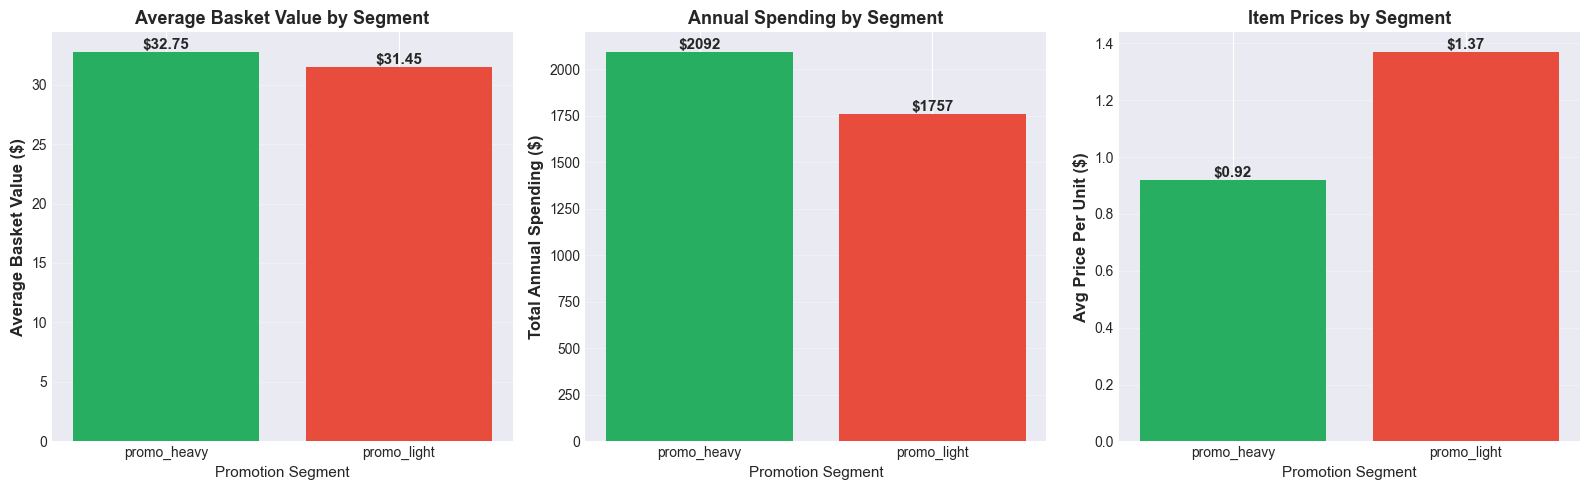

In [23]:

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

colors = ['#27ae60', '#e74c3c']

ax1 = axes[0]
basket_data = promo_summary['mean_avg_basket']
bars1 = ax1.bar(basket_data.index, basket_data.values, color=colors)
ax1.set_ylabel('Average Basket Value ($)', fontsize=12, fontweight='bold')
ax1.set_title('Average Basket Value by Segment', fontsize=13, fontweight='bold')
ax1.set_xlabel('Promotion Segment', fontsize=11)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2 = axes[1]
sales_data = promo_summary['mean_total_sales']
bars2 = ax2.bar(sales_data.index, sales_data.values, color=colors)
ax2.set_ylabel('Total Annual Spending ($)', fontsize=12, fontweight='bold')
ax2.set_title('Annual Spending by Segment', fontsize=13, fontweight='bold')
ax2.set_xlabel('Promotion Segment', fontsize=11)
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax3 = axes[2]
if 'mean_avg_price_unit' in promo_summary.columns:
    price_data = promo_summary['mean_avg_price_unit']
    bars3 = ax3.bar(price_data.index, price_data.values, color=colors)
    ax3.set_ylabel('Avg Price Per Unit ($)', fontsize=12, fontweight='bold')
    ax3.set_title('Item Prices by Segment', fontsize=13, fontweight='bold')
    label_format = '${:.2f}'
else:
    trips_data = promo_summary['mean_num_trips']
    bars3 = ax3.bar(trips_data.index, trips_data.values, color=colors)
    ax3.set_ylabel('Avg Shopping Trips', fontsize=12, fontweight='bold')
    ax3.set_title('Shopping Frequency by Segment', fontsize=13, fontweight='bold')
    label_format = '{:.1f}'

ax3.set_xlabel('Promotion Segment', fontsize=11)
ax3.tick_params(axis='x', rotation=0)
ax3.grid(axis='y', alpha=0.3)

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             label_format.format(height),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('./final_project_output/spending_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



In [24]:
print("SEGMENTATION DIAGNOSTIC")

print("\n1. Promo segment distribution:")
print(households["promo_segment"].value_counts())

print("\n2. Threshold values:")
print(
    f"   Discount threshold (75th percentile): {households['discount_share'].quantile(0.75):.1%}"
)
print(
    f"   Coupon threshold (75th percentile): {households['coupons_per_100_items'].quantile(0.75):.2f}"
)

print("\n3. How many households meet each criterion:")
print(
    f"   High discount users: {(households['discount_share'] >= households['discount_share'].quantile(0.75)).sum()}"
)
print(
    f"   High coupon users: {(households['coupons_per_100_items'] >= households['coupons_per_100_items'].quantile(0.75)).sum()}"
)

print("\n4. Sample of households with their segments:")
display(
    households[
        ["household_id", "discount_share", "coupons_per_100_items", "promo_segment"]
    ].head(20)
)

print("\n5. Promo summary contents:")
display(promo_summary)


SEGMENTATION DIAGNOSTIC

1. Promo segment distribution:
promo_segment
promo_light    1702
promo_heavy     767
Name: count, dtype: int64

2. Threshold values:
   Discount threshold (75th percentile): 56.9%
   Coupon threshold (75th percentile): 0.00

3. How many households meet each criterion:
   High discount users: 618
   High coupon users: 2469

4. Sample of households with their segments:


,household_id,discount_share,coupons_per_100_items,promo_segment
0,1,0.47,0.51,promo_heavy
1,2,0.46,0.00,promo_light
2,3,0.57,0.00,promo_heavy
3,4,0.48,0.00,promo_light
4,5,0.51,0.00,promo_light
5,6,0.37,0.00,promo_light
6,7,0.44,0.00,promo_light
7,8,0.50,0.09,promo_light
8,9,0.57,0.00,promo_heavy
9,10,0.50,0.00,promo_light



5. Promo summary contents:


,num_households,mean_total_sales,median_total_sales,mean_num_trips,mean_avg_basket,median_avg_basket,mean_avg_price_unit,median_avg_price_unit
promo_segment,,,,,,,,
promo_heavy,767,2092.36,1475.98,70.71,32.75,28.40,0.92,0.13
promo_light,1702,1757.46,1126.78,59.70,31.45,26.72,1.37,1.65


In [25]:

print("\n" + "=" * 80)
print("KEY FINDING: PROMO-HEAVY VS. PROMO-LIGHT")


promo_segments = promo_summary.index.tolist()

try:
    heavy_idx = [i for i, s in enumerate(promo_segments) if "heavy" in str(s).lower()][
        0
    ]
    light_idx = [i for i, s in enumerate(promo_segments) if "light" in str(s).lower()][
        0
    ]

    segment_heavy = promo_segments[heavy_idx]
    segment_light = promo_segments[light_idx]


except IndexError:
    print("⚠️ Using position-based indexing")
    heavy_idx = 0
    light_idx = 1
    segment_heavy = promo_segments[0]
    segment_light = promo_segments[1]

diff_basket = (
    promo_summary.iloc[heavy_idx]["mean_avg_basket"]
    - promo_summary.iloc[light_idx]["mean_avg_basket"]
)
diff_pct_basket = (diff_basket / promo_summary.iloc[light_idx]["mean_avg_basket"]) * 100

diff_sales = (
    promo_summary.iloc[heavy_idx]["mean_total_sales"]
    - promo_summary.iloc[light_idx]["mean_total_sales"]
)
diff_pct_sales = (diff_sales / promo_summary.iloc[light_idx]["mean_total_sales"]) * 100

print("\n📊 Basket Value:")
if diff_basket > 0:
    print(
        f"   {segment_heavy} households have {diff_pct_basket:.1f}% HIGHER average basket values"
    )
    print(
        f"   (${promo_summary.iloc[heavy_idx]['mean_avg_basket']:.2f} vs ${promo_summary.iloc[light_idx]['mean_avg_basket']:.2f})"
    )
    print("   ✓ This suggests they're high-value customers, not margin killers!")
else:
    print(
        f"   {segment_heavy} households have {abs(diff_pct_basket):.1f}% LOWER average basket values"
    )
    print(
        f"   (${promo_summary.iloc[heavy_idx]['mean_avg_basket']:.2f} vs ${promo_summary.iloc[light_idx]['mean_avg_basket']:.2f})"
    )
    print(
        "   ⚠️ This suggests promotions may attract price-sensitive, low-margin shoppers"
    )

print("\n📊 Annual Spending:")
if diff_sales > 0:
    print(f"   {segment_heavy} households spend {diff_pct_sales:.1f}% MORE annually")
    print(
        f"   (${promo_summary.iloc[heavy_idx]['mean_total_sales']:.2f} vs ${promo_summary.iloc[light_idx]['mean_total_sales']:.2f})"
    )
else:
    print(
        f"   {segment_heavy} households spend {abs(diff_pct_sales):.1f}% LESS annually"
    )
    print(
        f"   (${promo_summary.iloc[heavy_idx]['mean_total_sales']:.2f} vs ${promo_summary.iloc[light_idx]['mean_total_sales']:.2f})"
    )

if "mean_avg_price_unit" in promo_summary.columns:
    diff_price = (
        promo_summary.iloc[heavy_idx]["mean_avg_price_unit"]
        - promo_summary.iloc[light_idx]["mean_avg_price_unit"]
    )
    diff_pct_price = (
        diff_price / promo_summary.iloc[light_idx]["mean_avg_price_unit"]
    ) * 100

    print("\n📊 Item Prices:")
    if diff_price > 0:
        print(
            f"   {segment_heavy} households buy {diff_pct_price:.1f}% more expensive items"
        )
        print(
            f"   (${promo_summary.iloc[heavy_idx]['mean_avg_price_unit']:.2f} vs ${promo_summary.iloc[light_idx]['mean_avg_price_unit']:.2f} per unit)"
        )
    else:
        print(
            f"   {segment_heavy} households buy {abs(diff_pct_price):.1f}% cheaper items"
        )
        print(
            f"   (${promo_summary.iloc[heavy_idx]['mean_avg_price_unit']:.2f} vs ${promo_summary.iloc[light_idx]['mean_avg_price_unit']:.2f} per unit)"
        )



KEY FINDING: PROMO-HEAVY VS. PROMO-LIGHT

📊 Basket Value:
   promo_heavy households have 4.1% HIGHER average basket values
   ($32.75 vs $31.45)
   ✓ This suggests they're high-value customers, not margin killers!

📊 Annual Spending:
   promo_heavy households spend 19.1% MORE annually
   ($2092.36 vs $1757.46)

📊 Item Prices:
   promo_heavy households buy 32.8% cheaper items
   ($0.92 vs $1.37 per unit)


## 8. Demographic Analysis of Promotion Users

Now we examine **who** the promotion-heavy households are. We'll analyze:

- **Household composition** (kids vs. no kids)
- **Income brackets**
- **Household size**
- **Age groups**

This helps us understand which segments to target with promotional campaigns.


In [26]:


if 'kids_count' in households.columns:
    households['has_kids'] = (households['kids_count'] != '0').astype(int)
    
    kids_promo = (
        households
        .groupby(['has_kids', 'promo_segment'])
        .size()
        .unstack(fill_value=0)
    )
    
    kids_promo['total'] = kids_promo.sum(axis=1)
    kids_promo['promo_heavy_share'] = (
        kids_promo['promo_heavy'] / kids_promo['total']
    )
    
    print("\nPromotion segment distribution by kids status:")
    display(kids_promo)
    
    kids_spend = (
        households
        .groupby(['has_kids', 'promo_segment'])
        .agg(
            num_households=('household_id', 'nunique'),
            mean_total_sales=('total_sales', 'mean'),
            mean_avg_basket=('avg_basket_value', 'mean'),
            mean_discount_share=('discount_share', 'mean'),
            mean_coupons_per_100=('coupons_per_100_items', 'mean')
        )
        .round(2)
    )
    
    print("\nSpending & promotion behavior by kids status:")
    display(kids_spend)
    
    heavy_with_kids_pct = kids_promo.loc[1, 'promo_heavy_share'] if 1 in kids_promo.index else 0
    heavy_no_kids_pct = kids_promo.loc[0, 'promo_heavy_share'] if 0 in kids_promo.index else 0
    
    print("\n📊 Key Finding:")
    kids_summary_df = pd.DataFrame({
        'Household Type': ['With Kids', 'Without Kids'],
        'Promo-Heavy Rate': [f'{heavy_with_kids_pct:.1%}', f'{heavy_no_kids_pct:.1%}']
    })
    display(kids_summary_df.set_index('Household Type'))
    
    if heavy_with_kids_pct > heavy_no_kids_pct:
        print("   → Families with children are MORE promotion-aware")
    else:
        print("   → Childless households are MORE promotion-aware")
else:
    print("⚠️ Kids data not available in demographics")




Promotion segment distribution by kids status:


promo_segment,promo_heavy,promo_light,total,promo_heavy_share
has_kids,,,,
0,191,322,513,0.37
1,576,1380,1956,0.29



Spending & promotion behavior by kids status:


num_households  mean_total_sales  mean_avg_basket  mean_discount_share  mean_coupons_per_100
has_kids promo_segment                                                                                              
0        promo_heavy               191           3134.82            34.79                 0.58                  0.43
         promo_light               322           3161.41            35.46                 0.45                  0.02
1        promo_heavy               576           1746.68            32.08                 0.62                  0.16
         promo_light              1380           1429.87            30.52                 0.45                  0.01


📊 Key Finding:


,Promo-Heavy Rate
Household Type,
With Kids,29.4%
Without Kids,37.2%


   → Childless households are MORE promotion-aware


In [27]:

print("\n" + "=" * 80)
print("DEMOGRAPHIC BREAKDOWN: INCOME")

if 'income' in households.columns:
    income_promo = (
        households[households['income'].notna()]
        .groupby(['income', 'promo_segment'])
        .size()
        .unstack(fill_value=0)
    )
    
    income_promo['total'] = income_promo.sum(axis=1)
    income_promo['promo_heavy_share'] = (
        income_promo['promo_heavy'] / income_promo['total']
    )
    
    income_promo_sorted = income_promo.sort_values('promo_heavy_share', ascending=False)
    
    print("\nPromotion segment distribution by income (sorted by promo-heavy %):")
    display(income_promo_sorted)
    
    income_spend = (
        households[households['income'].notna()]
        .groupby(['income', 'promo_segment'])
        .agg(
            num_households=('household_id', 'nunique'),
            mean_total_sales=('total_sales', 'mean'),
            mean_avg_basket=('avg_basket_value', 'mean'),
            mean_discount_share=('discount_share', 'mean')
        )
        .round(2)
    )
    
    print("\nSpending behavior by income bracket:")
    display(income_spend.sort_index())
    
    top_promo_income = income_promo_sorted.index[0]
    top_promo_pct = income_promo_sorted.iloc[0]['promo_heavy_share']
    
    print("\n📊 Key Finding:")
    income_summary_df = pd.DataFrame({
        'Metric': ['Most Promo-Aware Income Bracket', 'Promo-Heavy Rate'],
        'Value': [top_promo_income, f'{top_promo_pct:.1%}']
    })
    display(income_summary_df.set_index('Metric'))
else:
    print("⚠️ Income data not available in demographics")




DEMOGRAPHIC BREAKDOWN: INCOME

Promotion segment distribution by income (sorted by promo-heavy %):


promo_segment,promo_heavy,promo_light,total,promo_heavy_share
income,,,,
50-74K,89,103,192,0.46
125-149K,17,21,38,0.45
25-34K,33,44,77,0.43
35-49K,65,107,172,0.38
75-99K,36,60,96,0.38
150-174K,11,19,30,0.37
15-24K,23,51,74,0.31
Under 15K,18,43,61,0.30
175-199K,3,8,11,0.27



Spending behavior by income bracket:


num_households  mean_total_sales  mean_avg_basket  mean_discount_share
income    promo_segment                                                                        
100-124K  promo_heavy                 7           4076.33            29.73                 0.61
          promo_light                27           3247.81            39.88                 0.46
125-149K  promo_heavy                17           4325.97            40.10                 0.56
          promo_light                21           4689.16            53.20                 0.43
15-24K    promo_heavy                23           2990.79            31.05                 0.58
          promo_light                51           2189.01            25.49                 0.46
150-174K  promo_heavy                11           5228.87            59.09                 0.50
          promo_light                19           4879.34            55.09                 0.43
175-199K  promo_heavy                 3           2806.56            38.61                 0.48
          promo_light                 8           5245.74            45.95                 0.41
200-249K  promo_heavy                 1           1765.37            49.04                 0.56
          promo_light                 4           3400.75            54.90                 0.40
25-34K    promo_heavy                33           3221.44            36.27                 0.58
          promo_light                44           2612.92            30.88                 0.47
250K+     promo_heavy                 1           2061.77            36.17                 0.64
          promo_light                10           6551.41            53.68                 0.39
35-49K    promo_heavy                65           2807.95            31.79                 0.59
          promo_light               107           2827.65            34.04                 0.47
50-74K    promo_heavy                89           3504.77            39.36                 0.57
          promo_light               103           3175.93            38.50                 0.46
75-99K    promo_heavy                36           3705.52            41.12                 0.59
          promo_light                60           3373.91            44.14                 0.44
Under 15K promo_heavy                18           3768.51            30.46                 0.59
          promo_light                43           2876.62            29.59                 0.47


📊 Key Finding:


,Value
Metric,
Most Promo-Aware Income Bracket,50-74K
Promo-Heavy Rate,46.4%


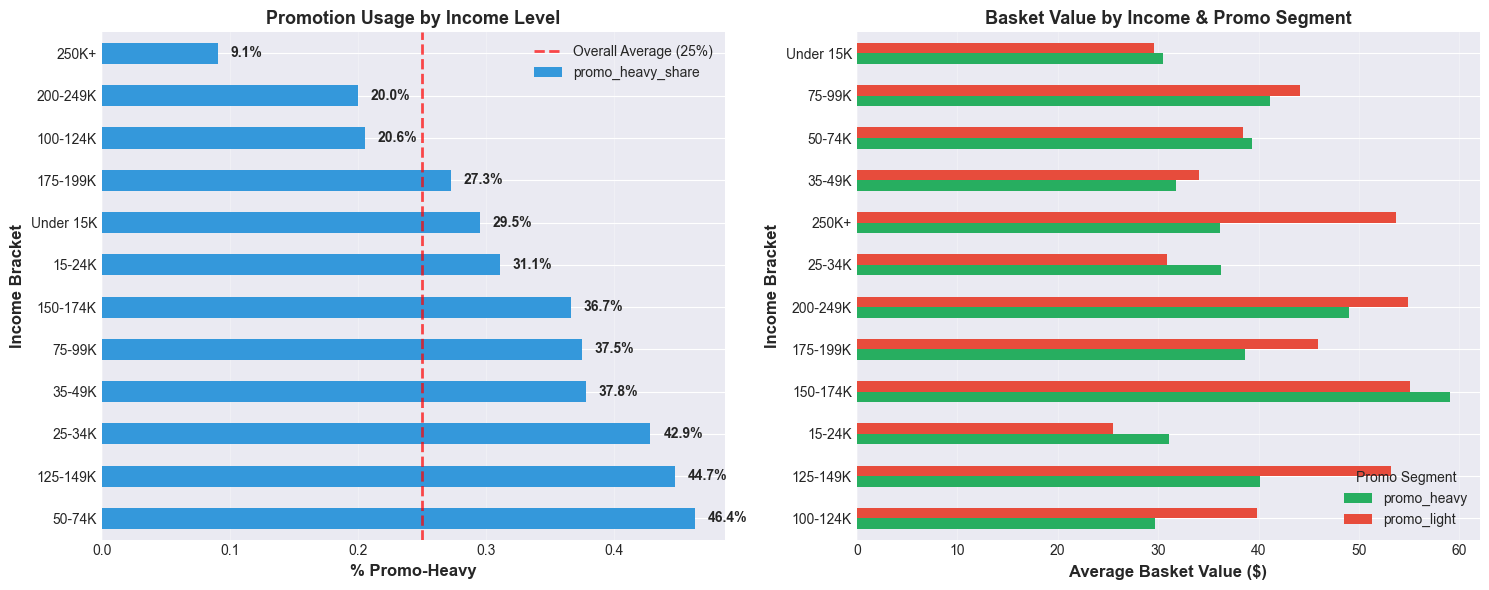

In [28]:

if 'income' in households.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1 = axes[0]
    income_promo_sorted['promo_heavy_share'].plot(kind='barh', ax=ax1, color='#3498db')
    ax1.set_xlabel('% Promo-Heavy', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Income Bracket', fontsize=12, fontweight='bold')
    ax1.set_title('Promotion Usage by Income Level', fontsize=13, fontweight='bold')
    ax1.axvline(x=0.25, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Overall Average (25%)')
    ax1.legend()
    ax1.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(income_promo_sorted['promo_heavy_share']):
        ax1.text(v + 0.01, i, f'{v:.1%}', va='center', fontsize=10, fontweight='bold')
    
    ax2 = axes[1]
    
    basket_by_income = households[households['income'].notna()].pivot_table(
        values='avg_basket_value',
        index='income',
        columns='promo_segment',
        aggfunc='mean'
    )
    
    basket_by_income.plot(kind='barh', ax=ax2, color=['#27ae60', '#e74c3c'])
    ax2.set_xlabel('Average Basket Value ($)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Income Bracket', fontsize=12, fontweight='bold')
    ax2.set_title('Basket Value by Income & Promo Segment', fontsize=13, fontweight='bold')
    ax2.legend(title='Promo Segment', loc='lower right')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./final_project_output/demographic_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

